# Sequence training
This is a just another notebook to study sequence training but now with the new sequence training functionality.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from network import BCPNN, NetworkManager
from data_transformer import build_ortogonal_patterns
from analysis_functions import calculate_angle_from_history
from analysis_functions import calculate_winning_pattern_from_distances, calculate_patterns_timings

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

#### Git

In [2]:
# Git

In [3]:
hypercolumns = 10
minicolumns = 10
n_patterns = 10  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# Build the network
nn = BCPNN(hypercolumns, minicolumns, k=1)
nn.randomize_pattern()

nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 1,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

In [4]:
dt = 0.001
T_training = 1.0
training_time = np.arange(0, T_training + dt, dt)

values_to_save = ['o', 'z_post', 'p_pre', 'w', 'a']
manager = NetworkManager(nn=nn, time=training_time, values_to_save=values_to_save)

for pattern in patterns:
    print('trained')
    manager.run_network(time=training_time, I=pattern)

trained
trained
trained
trained
trained
trained
trained
trained
trained
trained


We plot the training

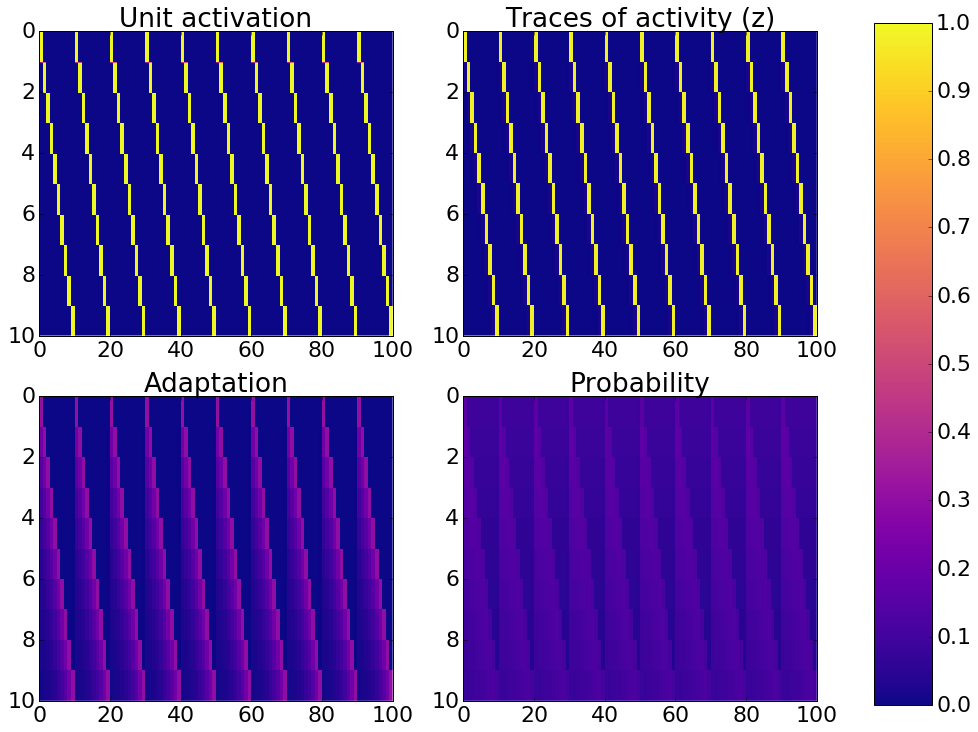

In [5]:
history = manager.history

cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, n_patterns * T_training, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)